## The comparison of Olympic medals won by countries worldwide in the Tokyo and Paris Games, involving the merging of two datasets to show trends and highlight the top-performing countries.

In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2021-olympics-medals-in-tokyo/Tokyo Medals 2021.csv
/kaggle/input/paris-2024-olympics-medals/olympics2024.csv


In [51]:
df_paris=pd.read_csv("/kaggle/input/paris-2024-olympics-medals/olympics2024.csv")
df_tokyo=pd.read_csv("/kaggle/input/2021-olympics-medals-in-tokyo/Tokyo Medals 2021.csv")

In [52]:
df_paris.head(3)

Rank        Country Country Code  Gold  Silver  Bronze  Total
0     1  United States           US    40      44      42    126
1     2          China          CHN    40      27      24     91
2     3          Japan          JPN    20      12      13     45

In [53]:
df_tokyo.head(3)

Country  Gold Medal  Silver Medal  Bronze Medal  Total  \
0    United States of America          39            41            33    113   
1  People's Republic of China          38            32            18     88   
2                       Japan          27            14            17     58   

   Rank By Total  
0              1  
1              2  
2              5

### Rename the columns

In [54]:
df_tokyo.rename(columns={
    'Rank By Total': 'Rank in Tokyo',
    'Country': 'Country',
    'Gold Medal': 'Gold in Tokyo',
    'Silver Medal': 'Silver in Tokyo',
    'Bronze Medal': 'Bronze in Tokyo',
    'Total': 'Total in Tokyo'
}, inplace=True)

df_paris.rename(columns={
    'Rank': 'Rank in Paris',
    'Country': 'Country',
    'Gold': 'Gold in Paris',
    'Silver': 'Silver in Paris',
    'Bronze': 'Bronze in Paris',
    'Total': 'Total in Paris'
}, inplace=True)

### Checking the country names

In [55]:
setparis=set(df_paris['Country'])
settokyo=set(df_tokyo['Country'])
setparis.union(settokyo)

{'Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Chinese Taipei',
 'Colombia',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Great Britain',
 'Greece',
 'Grenada',
 'Guatemala',
 'Hong Kong',
 'Hong Kong, China',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Islamic Republic of Iran',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Malaysia',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Morocco',
 'Namibia',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'North Korea',
 'North Macedonia',
 

### Normalize country names using a dictionary mapping by creating a dictionary to map the different names to a single name, then applying the mapping to the country names in both dataframes

In [56]:
name_mapping = {
    "People's Republic of China": 'China',
    'United States of America': 'United States',
    'ROC': 'Russia',  # Russian Olympic Committee
    'Republic of Korea': 'South Korea',
    'Ivory Coast': "Côte d'Ivoire",
    'Islamic Republic of Iran': 'Iran',
    'Hong Kong, China': 'Hong Kong',
    'North Korea': 'Democratic People\'s Republic of Korea',
}

df_tokyo['Country'] = df_tokyo['Country'].replace(name_mapping)
df_paris['Country'] = df_paris['Country'].replace(name_mapping)


### Merge the two dataframes on the 'Country' column

In [57]:
merged_df = pd.merge(df_tokyo, df_paris, on='Country', how='outer')

In [58]:
merged_df.head()

Country  Gold in Tokyo  Silver in Tokyo  Bronze in Tokyo  Total in Tokyo  \
0    Albania            NaN              NaN              NaN             NaN   
1    Algeria            NaN              NaN              NaN             NaN   
2  Argentina            0.0              1.0              2.0             3.0   
3    Armenia            0.0              2.0              2.0             4.0   
4  Australia           17.0              7.0             22.0            46.0   

   Rank in Tokyo  Rank in Paris Country Code  Gold in Paris  Silver in Paris  \
0            NaN           80.0          ALB            0.0              0.0   
1            NaN           39.0          ALG            2.0              0.0   
2           60.0           52.0          ARG            1.0              1.0   
3           47.0           66.0          ARM            0.0              3.0   
4            6.0            4.0          AUS           18.0             19.0   

   Bronze in Paris  Total in Paris  
0              2.0             2.0  
1              1.0             3.0  
2              1.0             3.0  
3              1.0             4.0  
4             16.0            53.0

### Handle NaN values by filling them with zeros, Convert all relevant columns to integers, Convert all relevant columns to integers, Exclude 'Country' and 'Country Code' columns from conversion and add them next to each other, Calculate the sum of paris and tokyo for each country

In [59]:
merged_df.fillna(0, inplace=True)
columns_to_convert = merged_df.columns.drop(['Country', 'Country Code'])
merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(int)

columns_order = ['Country', 'Country Code'] + [col for col in merged_df.columns if col not in ['Country', 'Country Code']]
merged_df = merged_df[columns_order]

merged_df['Total Medals Combined'] = merged_df['Total in Tokyo'] + merged_df['Total in Paris']

In [60]:
merged_df.head()

Country Country Code  Gold in Tokyo  Silver in Tokyo  Bronze in Tokyo  \
0    Albania          ALB              0                0                0   
1    Algeria          ALG              0                0                0   
2  Argentina          ARG              0                1                2   
3    Armenia          ARM              0                2                2   
4  Australia          AUS             17                7               22   

   Total in Tokyo  Rank in Tokyo  Rank in Paris  Gold in Paris  \
0               0              0             80              0   
1               0              0             39              2   
2               3             60             52              1   
3               4             47             66              0   
4              46              6              4             18   

   Silver in Paris  Bronze in Paris  Total in Paris  Total Medals Combined  
0                0                2               2                      2  
1                0                1               3                      3  
2                1                1               3                      6  
3                3                1               4                      8  
4               19               16              53                     99

In [61]:
merged_df = merged_df.sort_values(by=['Total Medals Combined', 'Total in Paris','Total in Tokyo'],ascending=False)

### Sort by Total Medals Combined and select the top 10, Create a bar chart, Plot Tokyo medals, Plot Paris medals on top of Tokyo medals

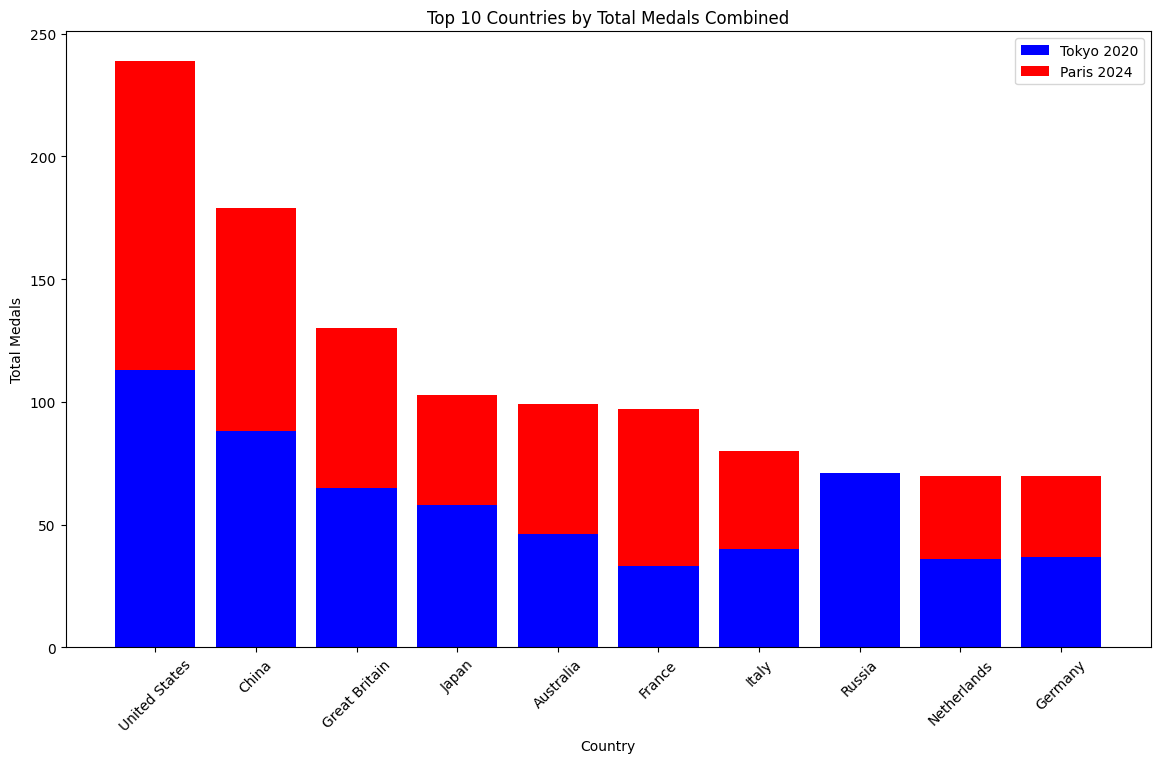

In [62]:
top_10 = merged_df.sort_values('Total Medals Combined', ascending=False).head(10)

plt.figure(figsize=(14, 8))

plt.bar(top_10['Country'], top_10['Total in Tokyo'], label='Tokyo 2020', color='blue')
plt.bar(top_10['Country'], top_10['Total in Paris'], bottom=top_10['Total in Tokyo'], label='Paris 2024', color='red')

plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.title('Top 10 Countries by Total Medals Combined')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Show Countries with Upward and Downward Trajectories

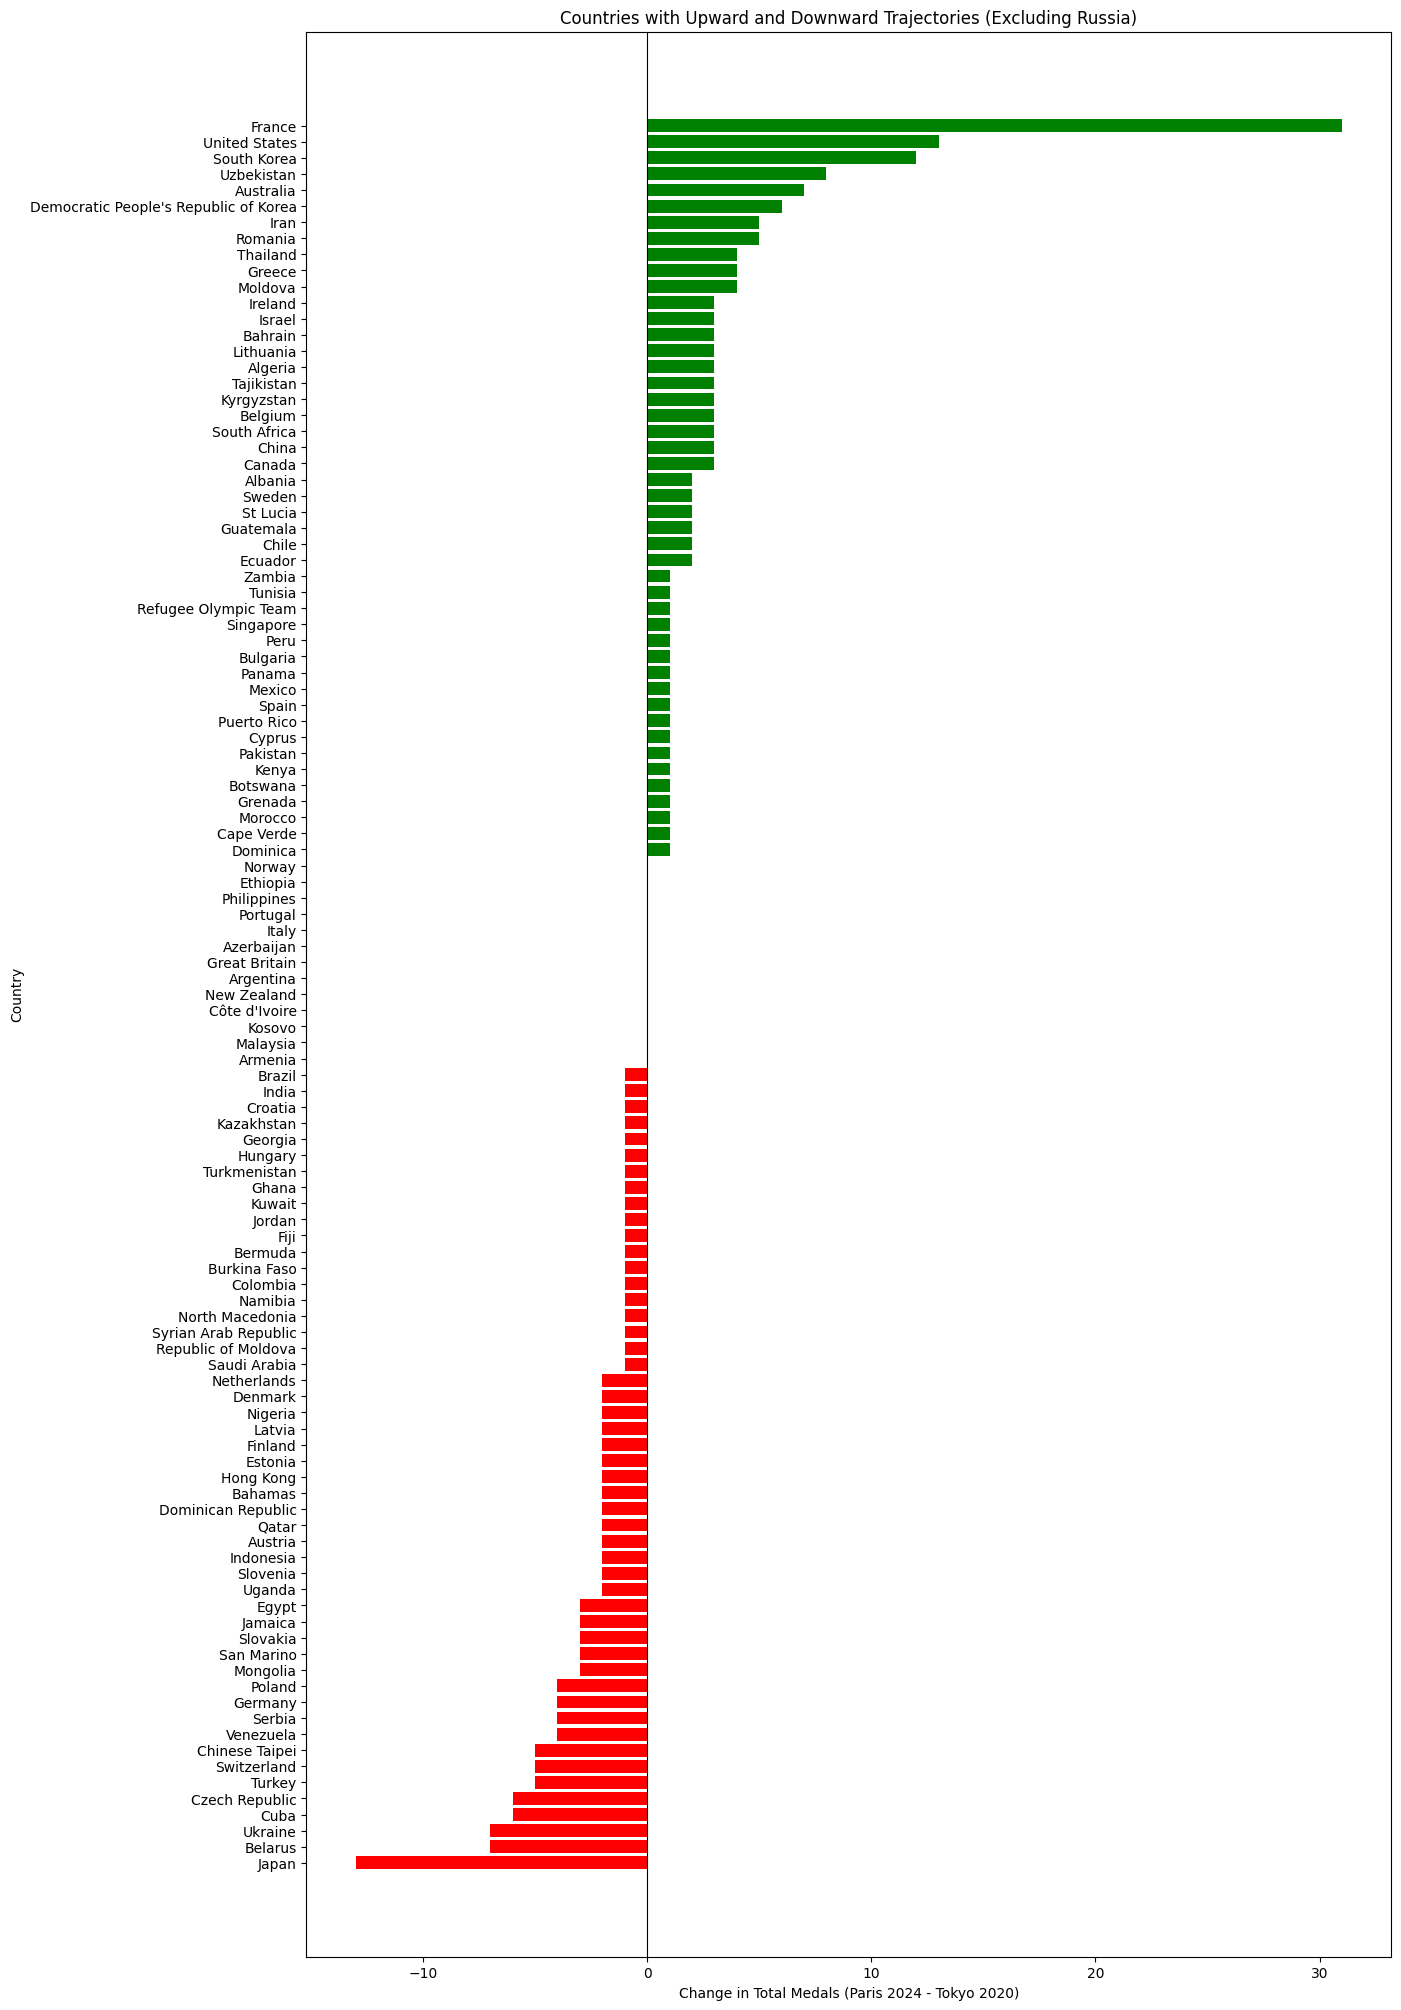

In [63]:
# Create a new DataFrame without Russia (ROC)
# Note: Russia is under sanctions, and its data is not available for Tokyo 2020.
df_without_russia = merged_df[merged_df['Country'] != 'Russia'].copy()

# Recalculate the trajectory without Russia
df_without_russia['Trajectory'] = df_without_russia['Total in Paris'] - df_without_russia['Total in Tokyo']

# Sort by Trajectory for better visualization
df_sorted_trajectory = df_without_russia.sort_values('Trajectory', ascending=True)

# Create the bar chart for all countries (excluding Russia)
plt.figure(figsize=(14, 25))

# Positive trajectories (upward)
bars = plt.barh(df_sorted_trajectory['Country'], df_sorted_trajectory['Trajectory'], color=df_sorted_trajectory['Trajectory'].apply(lambda x: 'green' if x > 0 else 'red'))

# Adding labels and title
plt.xlabel('Change in Total Medals (Paris 2024 - Tokyo 2020)')
plt.ylabel('Country')
plt.title('Countries with Upward and Downward Trajectories (Excluding Russia)')
plt.axvline(0, color='black', linewidth=0.8)

# Adjusting y-tick labels for readability
plt.yticks(df_sorted_trajectory['Country'], fontsize=10, rotation=0, ha='right')

plt.show()

### Top 5 Upward and Downward Trajectories (excluding Russia)

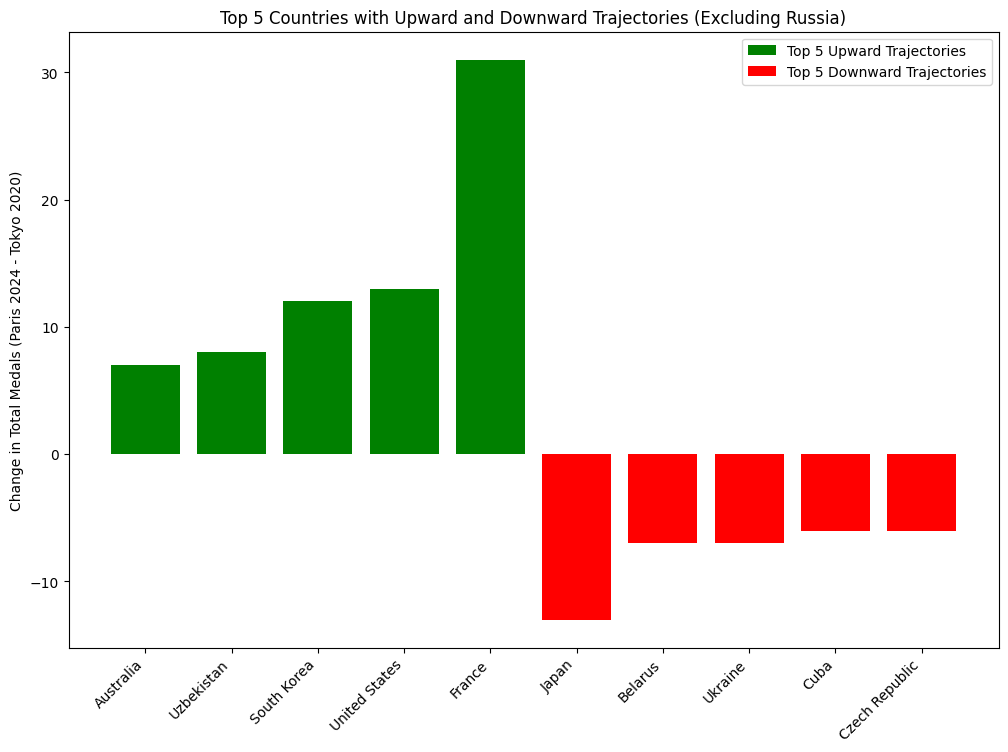

In [64]:
top_upward = df_sorted_trajectory.tail(5)
top_downward = df_sorted_trajectory.head(5)

# Create a combined bar chart for top upward and downward trajectories
plt.figure(figsize=(12, 8))

# Upward trajectories
plt.bar(top_upward['Country'], top_upward['Trajectory'], color='green', label='Top 5 Upward Trajectories')

# Downward trajectories
plt.bar(top_downward['Country'], top_downward['Trajectory'], color='red', label='Top 5 Downward Trajectories')

# Adding labels and title
plt.ylabel('Change in Total Medals (Paris 2024 - Tokyo 2020)')
plt.title('Top 5 Countries with Upward and Downward Trajectories (Excluding Russia)')
plt.legend()

plt.xticks(rotation=45, ha='right')
plt.show()


### Pie chart of the top 20 countries by Total Medals Combined

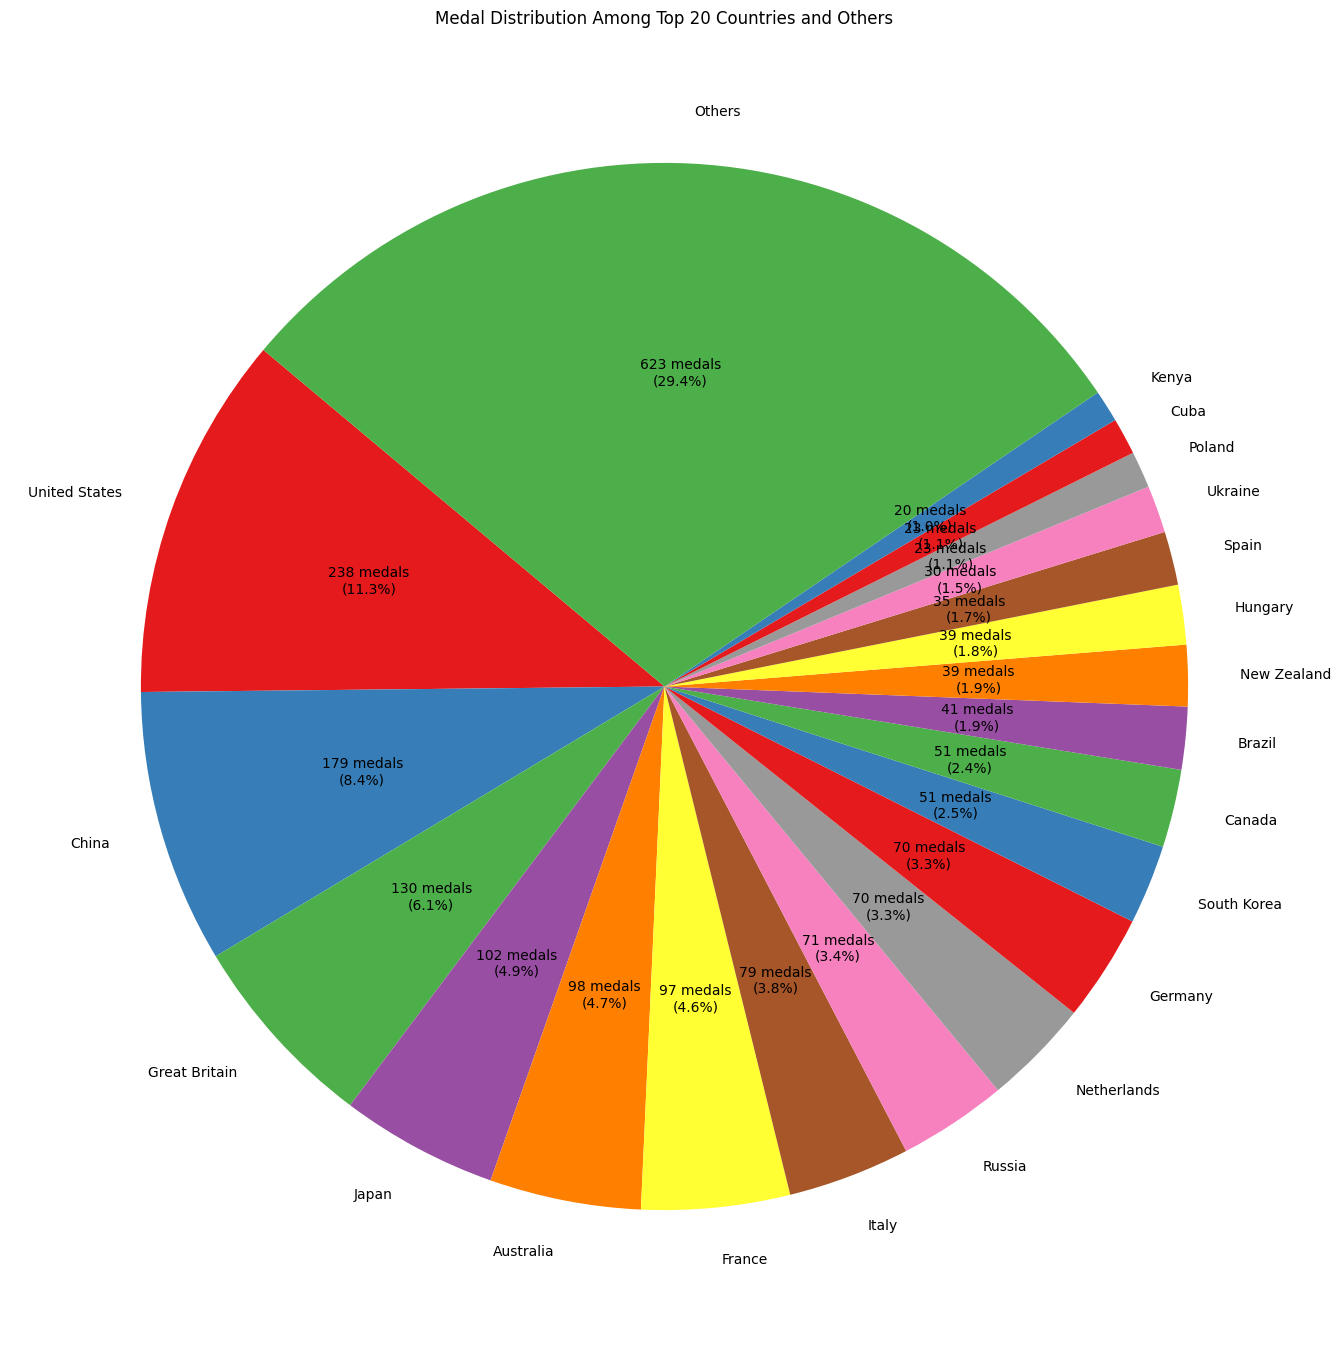

In [68]:
# Calculate the total medals for the top 20 countries
top_20 = merged_df.sort_values('Total Medals Combined', ascending=False).head(20)
top_20_total_medals = top_20['Total Medals Combined'].sum()

# Calculate the total medals for the remaining countries (Others)
total_medals = merged_df['Total Medals Combined'].sum()
others_medals = total_medals - top_20_total_medals

# Prepare data for the pie chart
labels = top_20['Country'].tolist() + ['Others']
sizes = top_20['Total Medals Combined'].tolist() + [others_medals]
colors = sns.color_palette("Set1", n_colors=21)  # color palette with 21 colors (20 + 1 for "Others")

def autopct_func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{absolute} medals\n({pct:.1f}%)"

# Create the pie chart
plt.figure(figsize=(17, 17))
plt.pie(sizes, labels=labels, autopct=lambda pct: autopct_func(pct, sizes), colors=colors, startangle=140)
plt.title('Medal Distribution Among Top 20 Countries and Others')
plt.show()
